In [13]:
pip -q install pycaret mlflow

In [14]:
from pycaret.datasets import get_data
data = get_data('insurance')
data.shape

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


(1338, 7)

In [15]:
from pycaret.regression import *
reg1 = setup(data, target = 'charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [12]:
best_model = compare_models(fold=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1370
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.4100
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.1670
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.2590
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0730
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.0970
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0570
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0550
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0560
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0560


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

2025/11/17 22:34:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/17 22:34:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/17 22:34:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/17 22:34:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/17 22:34:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/17 22:34:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/11/17 22:34:41 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use 

In [16]:
tuned = tune_model(best_model)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3381.8977,29784640.9974,5457.5307,0.8221,0.5658,0.4746
1,3521.9179,33160862.8554,5758.5469,0.8072,0.5228,0.3915
2,3706.5756,35854979.4177,5987.9028,0.5460,0.7968,0.5367
3,3845.1139,33132623.3741,5756.0945,0.7233,0.7606,0.5996
4,3801.3662,39868499.5152,6314.1507,0.7035,0.6453,0.4905
5,3617.8384,30867730.0487,5555.8735,0.8014,0.5108,0.3681
6,3353.2437,27372536.3200,5231.8769,0.8137,0.5943,0.4230
7,3194.4748,30683404.6026,5539.2603,0.8313,0.7119,0.3353
8,3013.4542,23912385.3280,4890.0292,0.8455,0.5965,0.5120


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


2025/11/17 22:35:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/17 22:35:29 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [17]:
final = finalize_model(tuned)


2025/11/17 22:35:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/17 22:35:31 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [18]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

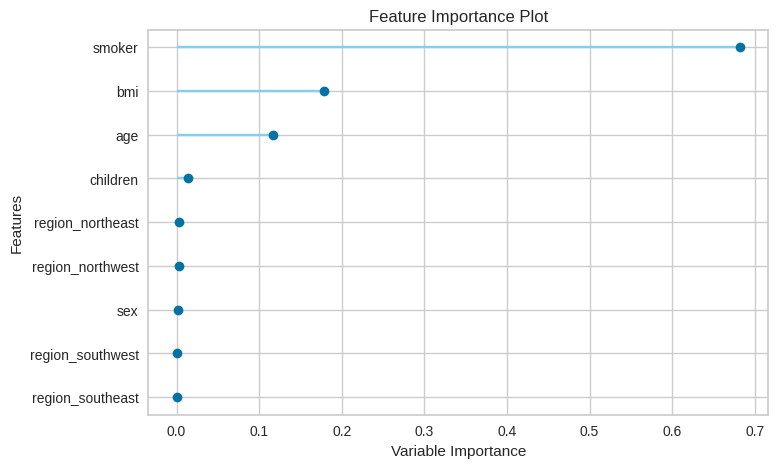

In [19]:
# visualizing models
plot_model(best_model, plot='feature')

In [20]:
preds = predict_model(final)
preds.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1868.8571,11410413.2895,3377.9303,0.9201,0.3024,0.2214


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10205.667203
319,32,male,37.334999,1,no,northeast,4667.607422,7273.443005
314,27,female,31.400000,0,yes,southwest,34838.871094,35355.008190
150,35,male,24.129999,1,no,northwest,5125.215820,6019.324062
336,60,male,25.740000,0,no,southeast,12142.578125,14666.982425


In [21]:
save_model(final, 'regression_insurance')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(